# Congressional Record and Hansard Descriptive Analysis


## Setup


In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv

DATA_PATH = 'data/'
DIST_PATH = 'dist/'

if not os.path.exists(DIST_PATH):
    os.makedirs(DIST_PATH)

plt.style.use('ggplot')
load_dotenv()

party_colours = {
    'Democrat': os.getenv('DEMOCRAT_BLUE'),
    'Republican': os.getenv('REPUBLICAN_RED'),
    'Conservative': os.getenv('CONSERVATIVE_BLUE'),
    'Labour': os.getenv('LABOUR_RED')}

## Time series trends


In [2]:
climate_congressional_record = pd.read_csv(
    DATA_PATH + 'climate_congressional_record.csv')
climate_hansard = pd.read_csv(DATA_PATH + 'climate_hansard.csv')

### Number of climate change speeches by month


**Climate Congressional Record plots**


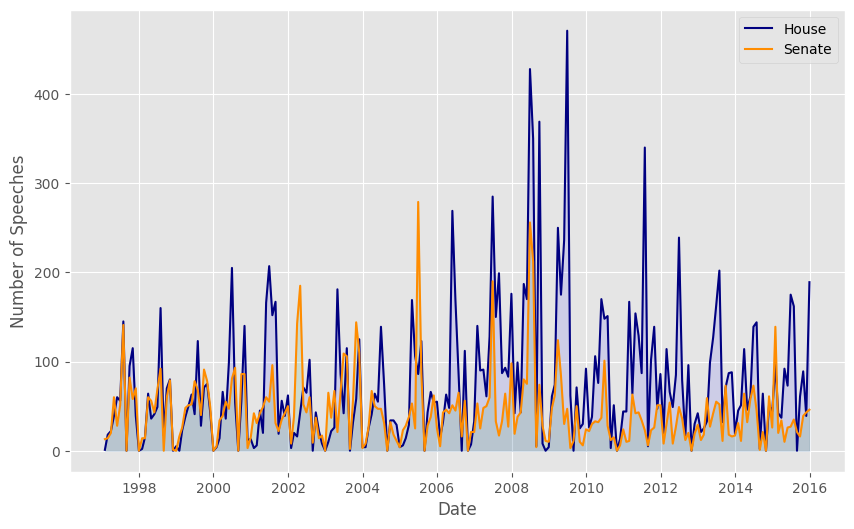

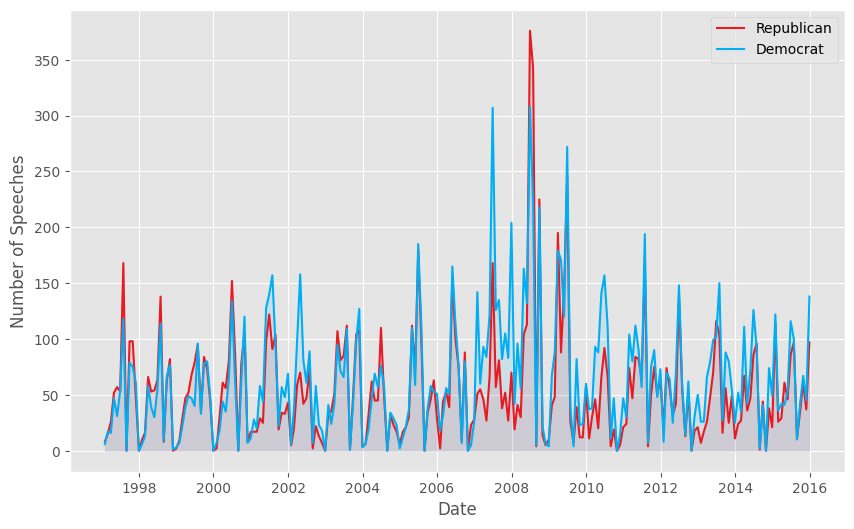

In [3]:
climate_congressional_record['date'] = pd.to_datetime(
    climate_congressional_record['date'])

house_speeches = climate_congressional_record[climate_congressional_record['chamber'] == 'H']
senate_speeches = climate_congressional_record[climate_congressional_record['chamber'] == 'S']

republican_speeches = climate_congressional_record[climate_congressional_record['party'] == 'R']
democratic_speeches = climate_congressional_record[climate_congressional_record['party'] == 'D']

monthly_house_speeches = house_speeches.groupby(pd.Grouper(
    key='date', freq='M')).size()
monthly_senate_speeches = senate_speeches.groupby(pd.Grouper(
    key='date', freq='M')).size()

monthly_republican_speeches = republican_speeches.groupby(pd.Grouper(
    key='date', freq='M')).size()
monthly_democratic_speeches = democratic_speeches.groupby(pd.Grouper(
    key='date', freq='M')).size()

plt.figure(figsize=(10, 6))
plt.plot(monthly_house_speeches, label='House', color='navy')
plt.plot(monthly_senate_speeches, label='Senate', color='darkorange')
plt.fill_between(monthly_house_speeches.index,
                 monthly_house_speeches, color='blue', alpha=0.1)
plt.fill_between(monthly_senate_speeches.index,
                 monthly_senate_speeches, color='green', alpha=0.1)
# plt.title('Monthly Climate Change Speeches in Congress')
plt.xlabel('Date')
plt.ylabel('Number of Speeches')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(monthly_republican_speeches, label='Republican',
         color=party_colours['Republican'])
plt.plot(monthly_democratic_speeches, label='Democrat',
         color=party_colours['Democrat'])
plt.fill_between(monthly_republican_speeches.index,
                 monthly_republican_speeches, color=party_colours['Republican'], alpha=0.1)
plt.fill_between(monthly_democratic_speeches.index,
                 monthly_democratic_speeches, color=party_colours['Democrat'], alpha=0.1)
# plt.title('Monthly Climate Change Speeches by Party')
plt.xlabel('Date')
plt.ylabel('Number of Speeches')
plt.legend()
plt.show()

**Climate Congressional Record statistics**


In [4]:
print(f'Monthly House Speeches:\n{monthly_house_speeches.describe()}')
print(f'Monthly Senate Speeches:\n{monthly_senate_speeches.describe()}')
print(
    f'Monthly Republican Speeches:\n{monthly_republican_speeches.describe()}')
print(
    f'Monthly Democrat Speeches:\n{monthly_democratic_speeches.describe()}')

print(f'Month with most House Speeches: {monthly_house_speeches.idxmax()}')
print(f'Month with most Senate Speeches: {monthly_senate_speeches.idxmax()}')

Monthly House Speeches:
count    228.000000
mean      75.219298
std       76.805121
min        0.000000
25%       22.000000
50%       54.500000
75%       99.750000
max      471.000000
dtype: float64
Monthly Senate Speeches:
count    228.000000
mean      43.390351
std       40.286871
min        0.000000
25%       17.000000
50%       35.500000
75%       56.250000
max      279.000000
dtype: float64
Monthly Republican Speeches:
count    228.000000
mean      54.105263
std       51.877842
min        0.000000
25%       19.000000
50%       45.500000
75%       74.000000
max      376.000000
dtype: float64
Monthly Democrat Speeches:
count    228.000000
mean      64.504386
std       54.420171
min        0.000000
25%       24.750000
50%       55.000000
75%       90.000000
max      308.000000
dtype: float64
Month with most House Speeches: 2009-06-30 00:00:00
Month with most Senate Speeches: 2005-06-30 00:00:00


**Climate Hansard plots**


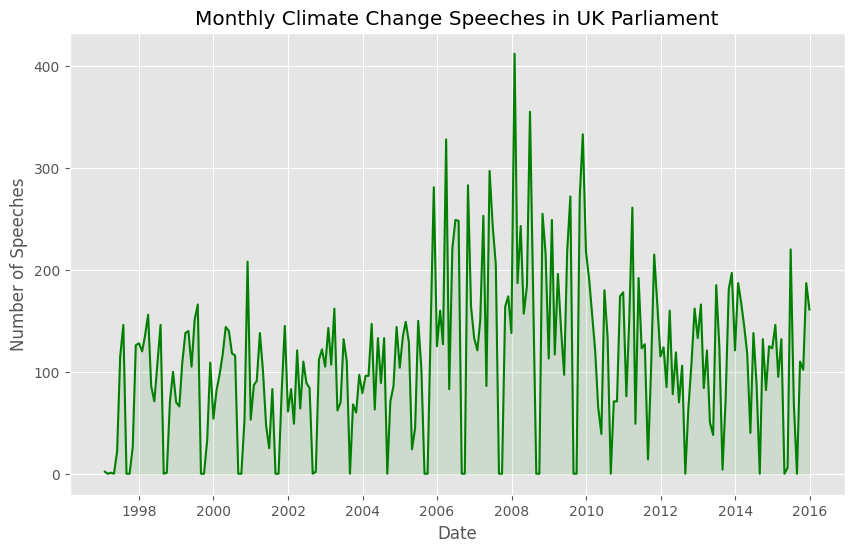

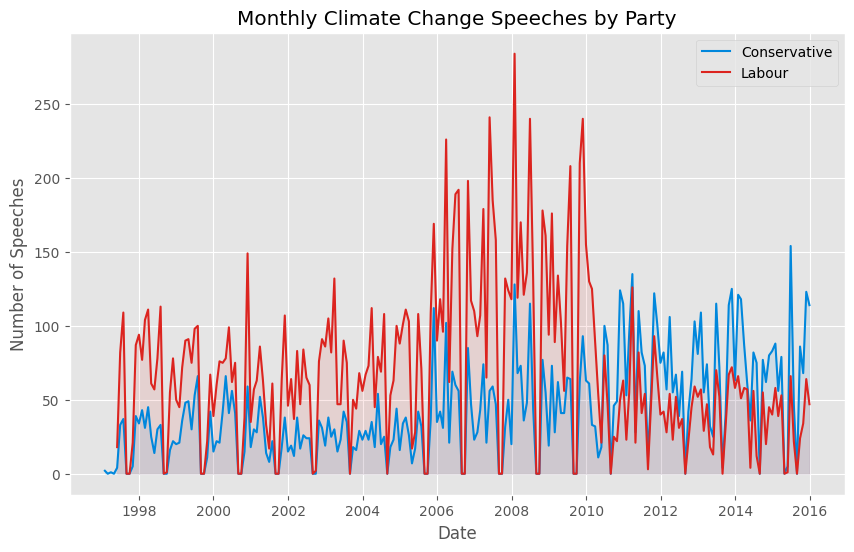

In [5]:
climate_hansard['speech_date'] = pd.to_datetime(climate_hansard['speech_date'])

conservative_speeches = climate_hansard[climate_hansard['speech_party']
                                        == 'Conservative']
labour_speeches = climate_hansard[climate_hansard['speech_party'] == 'Labour']

monthly_hansard_speeches = climate_hansard.groupby(pd.Grouper(
    key='speech_date', freq='M')).size()

monthly_conservative_speeches = conservative_speeches.groupby(pd.Grouper(
    key='speech_date', freq='M')).size()
monthly_labour_speeches = labour_speeches.groupby(pd.Grouper(
    key='speech_date', freq='M')).size()

plt.figure(figsize=(10, 6))
plt.plot(monthly_hansard_speeches, label='Hansard', color='green')
plt.fill_between(monthly_hansard_speeches.index,
                 monthly_hansard_speeches, color='green', alpha=0.1)
plt.title('Monthly Climate Change Speeches in UK Parliament')
plt.xlabel('Date')
plt.ylabel('Number of Speeches')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(monthly_conservative_speeches, label='Conservative',
         color=party_colours['Conservative'])
plt.plot(monthly_labour_speeches, label='Labour',
         color=party_colours['Labour'])
plt.fill_between(monthly_conservative_speeches.index,
                 monthly_conservative_speeches, color=party_colours['Conservative'], alpha=0.1)
plt.fill_between(monthly_labour_speeches.index,
                 monthly_labour_speeches, color=party_colours['Labour'], alpha=0.1)
plt.title('Monthly Climate Change Speeches by Party')
plt.xlabel('Date')
plt.ylabel('Number of Speeches')
plt.legend()
plt.show()

**Climate Hansard statistics**


In [6]:
print(f'Monthly Hansard Speeches:\n{monthly_hansard_speeches.describe()}')
print(
    f'Monthly Conservative Speeches:\n{monthly_conservative_speeches.describe()}')
print(f'Monthly Labour Speeches:\n{monthly_labour_speeches.describe()}')

print(
    f'Month with the most speeches in the HoC: {monthly_house_speeches.idxmax()}')

Monthly Hansard Speeches:
count    228.000000
mean     111.885965
std       77.347407
min        0.000000
25%       64.000000
50%      111.000000
75%      150.000000
max      412.000000
dtype: float64
Monthly Conservative Speeches:
count    228.000000
mean      43.008772
std       34.417365
min        0.000000
25%       18.000000
50%       36.000000
75%       63.000000
max      154.000000
dtype: float64
Monthly Labour Speeches:
count    224.000000
mean      70.107143
std       54.887550
min        0.000000
25%       32.750000
50%       62.000000
75%       96.500000
max      284.000000
dtype: float64
Month with the most speeches in the HoC: 2009-06-30 00:00:00


## Static analysis


In [7]:
climate_congressional_record = pd.read_csv(
    DATA_PATH + 'climate_congressional_record.csv')
climate_hansard = pd.read_csv(DATA_PATH + 'climate_hansard.csv')

### Number of climate change speeches by individual politicians


**Climate Congressional Record**


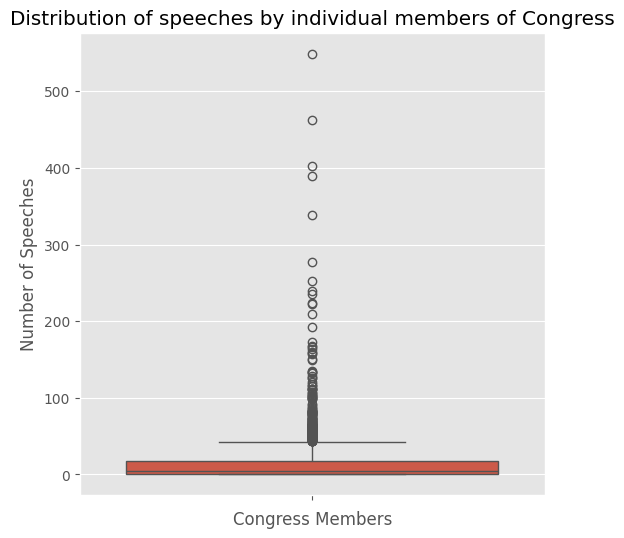

,Speaker,Number of Speeches
146,Mr. BINGAMAN,549
928,Mr. REID,462
158,Mr. BLUMENAUER,402
1269,Mrs. BOXER,390
362,Mr. DOMENICI,339
790,Mr. MURKOWSKI,277
574,Mr. INHOFE,253
577,Mr. INSLEE,240
301,Mr. CRAIG,236
1139,Mr. WAXMAN,224


In [26]:
individaul_contributions = climate_congressional_record.groupby(
    'speaker').size().reset_index()
individaul_contributions.columns = ['Speaker', 'Number of Speeches']
individaul_contributions = individaul_contributions.sort_values(
    'Number of Speeches', ascending=False)

plt.figure(figsize=(6, 6))
sns.boxplot(y='Number of Speeches',
            data=individaul_contributions)
plt.xlabel('Congress Members')
plt.title('Distribution of speeches by individual members of Congress')
plt.show()

individaul_contributions.head(10)

**Climate Hansard**


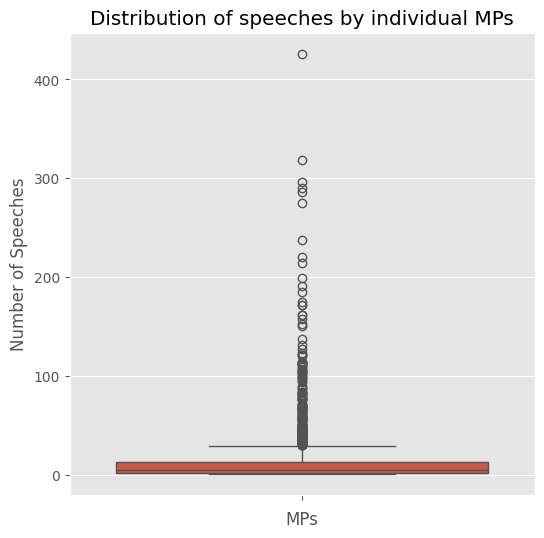

,Speaker,Number of Speeches
397,Gregory Barker,426
212,David Cameron,318
323,Elliot Morley,296
317,Edward Miliband,290
379,Gordon Brown,286
420,Hilary Benn,275
1715,Tony Blair,238
26,Alistair Darling,220
140,Caroline Flint,214
234,David Miliband,199


In [25]:
individaul_contributions = climate_hansard.groupby(
    'name').size().reset_index()
individaul_contributions.columns = ['Speaker', 'Number of Speeches']
individaul_contributions = individaul_contributions.sort_values(
    'Number of Speeches', ascending=False)

plt.figure(figsize=(6, 6))
sns.boxplot(y='Number of Speeches', data=individaul_contributions)
plt.xlabel('MPs')
plt.title('Distribution of speeches by individual MPs')
plt.show()

individaul_contributions.head(10)